# Flow Show Scheduling with Setup Costs

In [6]:
from pyschedule import Scenario, solvers, plotters

horizon = 30
S = Scenario('flow_setup_scheduling',horizon=horizon)
hide_tasks = list()

# three machines
M1, M2, M3 = S.Resource('M1'), S.Resource('M2'), S.Resource('M3')

# task groups A
A_color = '#E68B07'
A_M1 = S.Tasks(name='A_M1',n_tasks=2,length=2,setup_state_A=2,is_group=True,plot_color=A_color)
A_M1 *= M1
A_M2 = S.Tasks(name='A_M2',n_tasks=2,length=1+3,is_group=True,plot_color=A_color)
A_M2 *= M2
A_M3 = S.Tasks(name='A_M3',n_tasks=2,length=1+2,is_group=True,plot_color=A_color)
A_M3 *= M3

# task groups B
B_color = '#37F810'
B_M1 = S.Tasks(name='B_M1',n_tasks=3,length=1,setup_state_B=2,is_group=True,plot_color=B_color)
B_M1 *= M1
B_M2 = S.Tasks(name='B_M2',n_tasks=3,length=1+3,is_group=True,plot_color=B_color)
B_M2 *= M2
B_M3 = S.Tasks(name='B_M3',n_tasks=3,length=1+2,is_group=True,plot_color=B_color)
B_M3 *= M3

# precedence constraints
S += A_M1 <= A_M2, A_M2 <= A_M3
S += B_M1 <= B_M2, B_M2 <= B_M3
S += A_M1 > 1 # first task need to be a setup task
S += B_M1 > 1 # first task need to be a setup task

# setup tasks to move from setup state 0 to 2
SA = S.Tasks(name='SA_M1',n_tasks=horizon,setup_state_A=1,schedule_cost=1000,is_group=True,plot_color=A_color)
SA *= M1
SB = S.Tasks(name='SB_M1',n_tasks=horizon,setup_state_B=1,schedule_cost=1000,is_group=True,plot_color=B_color)
SB *= M1

# fill tasks with no schedule cost and setup state 2 to bridge the gap between real tasks
FA = S.Tasks(name='FA_M1',n_tasks=horizon,setup_state_A=2,schedule_cost=0,is_group=True,plot_color=None)
FA *= M1
S += FA > 1 # first task need to be a setup task
FB = S.Tasks(name='FB_M1',n_tasks=horizon,setup_state_B=2,schedule_cost=0,is_group=True,plot_color=None)
FB *= M1
S += FB > 1 # first task need to be a setup task


# each setup state is only allowed to increase by 1 in every step
# hence, we need to run a setup task with setup state 1 before moving on
# to a real task with setup state 2
for t in range(horizon):
    S += M1['setup_state_A'][t:t+2].inc <= 1
    S += M1['setup_state_B'][t:t+2].inc <= 1

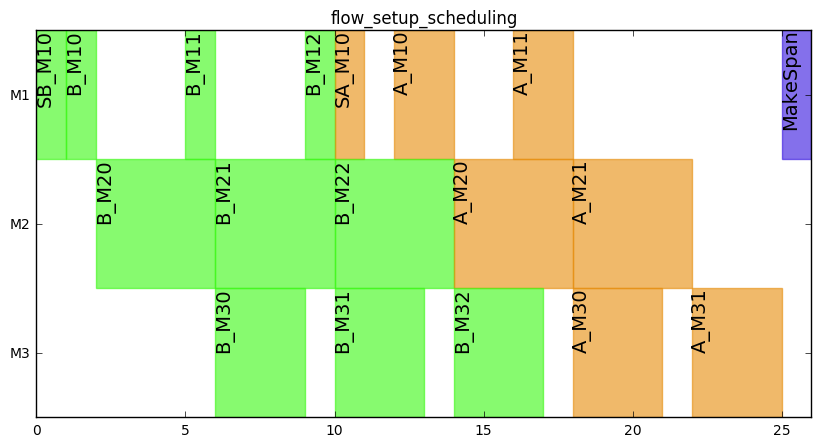

In [7]:
S.use_makespan_objective()

def run(S) :
    if solvers.mip.solve(S):
        %matplotlib inline
        plotters.matplotlib.plot(S,fig_size=(10,5),hide_tasks=hide_tasks,vertical_text=True)
    else:
        print('no solution exists')
run(S)